Work by **@Akash Sonowal**

In [1]:
import pandas as pd

In [2]:
news = pd.read_csv('/content/drive/MyDrive/IME 697 Summer Internship/Apple-News.csv')
stock_price = pd.read_csv('/content/drive/MyDrive/IME 697 Summer Internship/Apple-Stock-Price.csv')

In [3]:
news.head()

,Date,Apple News
0,2019-07-30,Tim Cook confirms Apple Card is rolling out ne...
1,2019-07-30,"iPhones have weak quarter, but wearables are d..."
2,2019-07-30,Apple announces that the Apple Card will launc...
3,2019-07-30,Apple jumps on earnings.
4,2019-07-30,"Loup's Gene Munster: Once again, Apple proves ..."


In [4]:
news.tail()

,Date,Apple News
9995,2021-06-17,Apple Is Already Building an Augmented Reality...
9996,2021-06-17,"Streaming's Easy-Growth Days Are Over, Apple a..."
9997,2021-06-17,Apple's (AAPL) Podcast Subscriptions to Aid Se...
9998,2021-06-17,Why Apple Shares Are Moving Today
9999,2021-06-17,Apple CEO Tim Cook Criticizes EU's Proposed Te...


In [5]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-30,52.189999,52.540001,51.827499,52.195000,51.234207,135742800
1,2019-07-31,54.105000,55.342499,52.825001,53.259998,52.279598,277125600
2,2019-08-01,53.474998,54.507500,51.685001,52.107498,51.148312,216071600
3,2019-08-02,51.382500,51.607498,50.407501,51.005001,50.066113,163448400
4,2019-08-05,49.497501,49.662498,48.145000,48.334999,47.445263,209572000


In [6]:
stock_price.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
470,2021-06-10,127.019997,128.190002,125.940002,126.110001,126.110001,71186400
471,2021-06-11,126.529999,127.440002,126.099998,127.349998,127.349998,53415300
472,2021-06-14,127.820000,130.539993,127.070000,130.479996,130.479996,96906500
473,2021-06-15,129.940002,130.600006,129.389999,129.639999,129.639999,62746300
474,2021-06-16,130.369995,130.889999,128.460007,130.149994,130.149994,91657900


In [7]:
news.isnull().sum()

Date          0
Apple News    0
dtype: int64

In [8]:
stock_price.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
print(stock_price.shape)
print(news.shape)

(475, 7)
(10000, 2)


In [10]:
# Compare the number of unique dates. We want matching values.
print(len(set(stock_price.Date)))
print(len(set(news.Date)))

475
680


In [11]:
# Remove the extra dates that are in news
news = news[news.Date.isin(stock_price.Date)]

In [12]:
print(len(set(stock_price.Date)))
print(len(set(news.Date)))

475
475


In [13]:
# Calculate the difference in opening prices between the following and current day.
# The model will try to predict how much the Open value will change based on the news.
# Remove unnecessary features
stock_price = stock_price.drop(['High','Low','Close','Adj Close','Volume'], 1)
stock_price = stock_price.set_index('Date').diff(periods=1)
stock_price['Date'] = stock_price.index
stock_price = stock_price.reset_index(drop=True)

In [14]:
stock_price.head()

,Open,Date
0,NaN,2019-07-30
1,1.915001,2019-07-31
2,-0.630001,2019-08-01
3,-2.092499,2019-08-02
4,-1.884998,2019-08-05


In [15]:
stock_price = stock_price[stock_price.Open.notnull()]

In [16]:
# Check if there are any more null values.
stock_price.isnull().sum()

Open    0
Date    0
dtype: int64

**Data Preprocessing begins here**

In [17]:
# Create a list of the opening prices and their corresponding daily headlines from the news
price = []
headlines = []

for row in stock_price.iterrows():
    daily_headlines = []
    date = row[1]['Date']
    price.append(row[1]['Open'])
    for row_ in news[news.Date==date].iterrows():
        daily_headlines.append(row_[1]['Apple News'])
    
    # Track progress
    headlines.append(''.join(daily_headlines))

In [18]:
# Compare lengths to ensure they are the same
print(len(price))
print(len(headlines))

474
474


In [19]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [20]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    # Convert words to lower case
    text = text.lower()
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r'0km ', '0 km ', text)
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Clean the headlines
clean_headlines = []
for daily_headlines in headlines:
    clean_headlines.append(clean_text(daily_headlines))

In [22]:
df = pd.DataFrame(list(zip(stock_price.Date,clean_headlines,price)), columns=['Date','Apple News','Price'])
df.head()

,Date,Apple News,Price
0,2019-07-31,apple confirms credit card launch augustjury d...,1.915001
1,2019-08-01,japan south korea trade war could give apple e...,-0.630001
2,2019-08-02,apple halts siri response grading program priv...,-2.092499
3,2019-08-05,top apple analyst kuo says iphone prices go hi...,-1.884998
4,2019-08-06,apple invites first customers apply credit car...,-0.420002


In [23]:
!pip install textblob
from textblob import TextBlob

In [24]:
df['polarity'] = df['Apple News'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['Apple News'].astype(str).apply(len)
df['word_count'] = df['Apple News'].apply(lambda x: len(str(x).split()))

In [25]:
df.head()

,Date,Apple News,Price,polarity,review_len,word_count
0,2019-07-31,apple confirms credit card launch augustjury d...,1.915001,0.068785,2353,326
1,2019-08-01,japan south korea trade war could give apple e...,-0.630001,0.235795,731,105
2,2019-08-02,apple halts siri response grading program priv...,-2.092499,0.074545,803,107
3,2019-08-05,top apple analyst kuo says iphone prices go hi...,-1.884998,0.080475,1039,148
4,2019-08-06,apple invites first customers apply credit car...,-0.420002,-0.028864,898,122


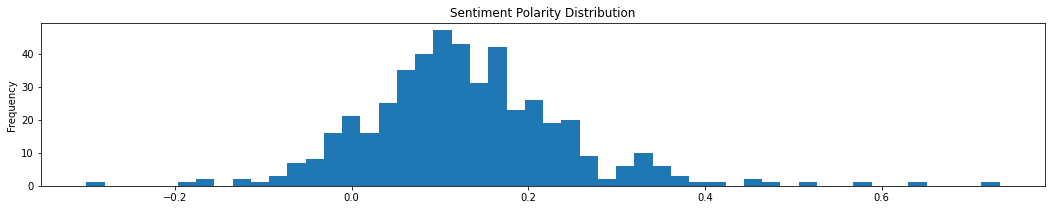

In [26]:
df['polarity'].plot(kind='hist',bins=50,title='Sentiment Polarity Distribution', figsize = (18, 3))

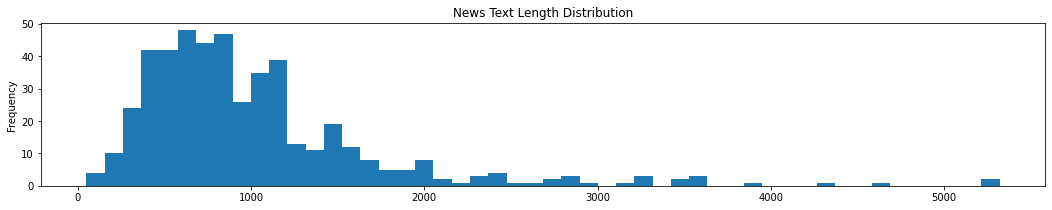

In [27]:
df['review_len'].plot(kind='hist',bins=50,title='News Text Length Distribution', figsize = (18, 3))

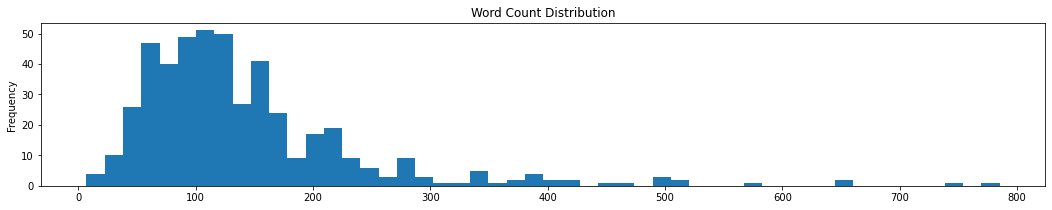

In [28]:
df['word_count'].plot(kind='hist',bins=50,title='Word Count Distribution', figsize = (18, 3))

In [29]:
df.loc[df.Price > 0 , "Price"] = 1
df.loc[df.Price <= 0, "Price"] = 0

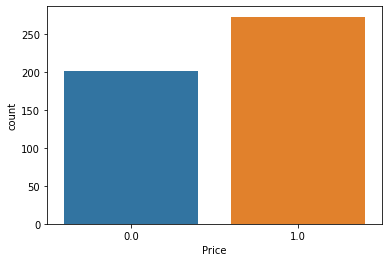

In [30]:
import seaborn as sns
sns.countplot(x=df['Price'])

apple 3770
iphone 981
stock 953
stocks 884
new 729
tech 644
app 458
buy 454
earnings 423
big 402
says 379
market 349
aapl 343
could 337
coronavirus 312
store 311
google 254
5g 240
top 238
12 227


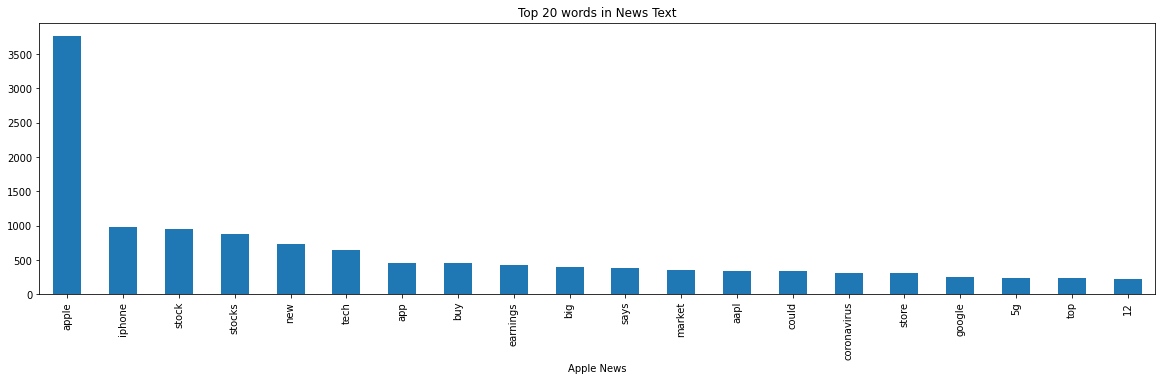

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Apple News'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Apple News' , 'count'])
df1.groupby('Apple News').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 words in News Text', figsize=(20, 5))

apple stock 311
app store 251
stocks buy 206
big tech 187
iphone 12 183
united states 158
tech stocks 158
tim cook 144
iphone 11 105
covid 19 96
apple tv 90
ceo tim 83
apple iphone 80
apple google 78
apple app 76
price target 75
apple watch 67
iphone sales 66
epic games 66
apple aapl 63


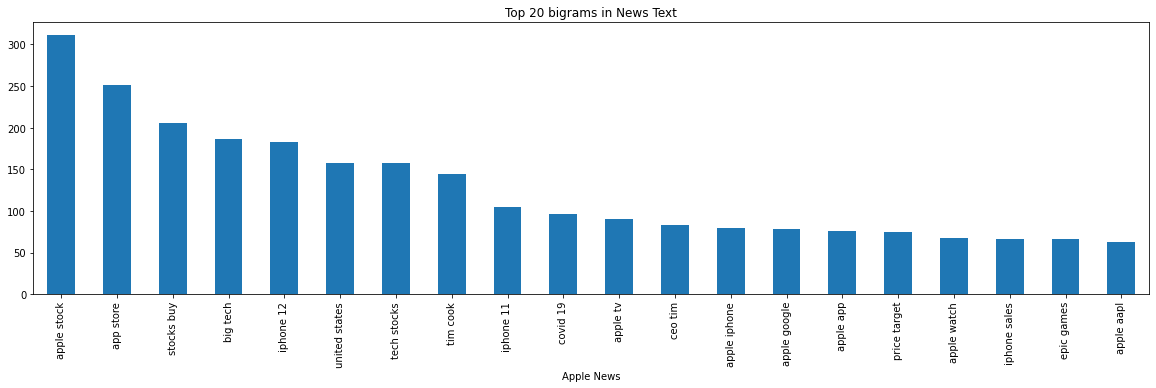

In [32]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['Apple News'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Apple News' , 'count'])
df2.groupby('Apple News').sum()['count'].sort_values(ascending=False).plot(kind='bar',title='Top 20 bigrams in News Text', figsize=(20, 5))

ceo tim cook 82
apple app store 60
tech stocks buy 46
top stock trades 39
iphone 12 pro 27
apple ceo tim 24
trillion market cap 23
apple price target 22
apple stock split 20
apple rumors apple 19
apple iphone 12 19
results earnings call 18
amazon apple facebook 17
blue chip stocks 16
buy apple stock 15
big tech stocks 15
12 iphone 12 15
big tech antitrust 14
apple watch series 14
apple aapl stock 14


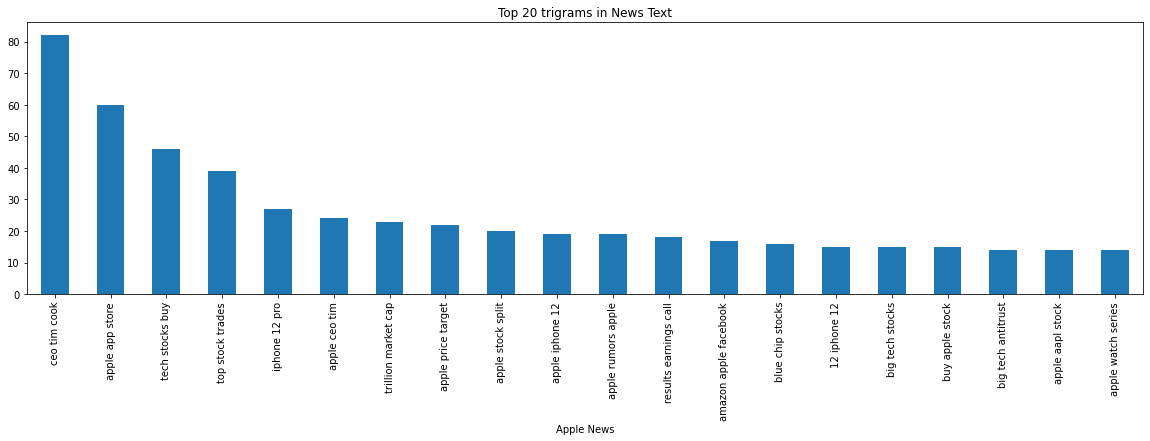

In [33]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['Apple News'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Apple News','count'])
df3.groupby('Apple News').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 trigrams in News Text', figsize=(20,5))

In [34]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
# function to perform lemmatization of the word
def lemmatize_data(data, lemmatizer):
    cleaned_dataset = []
    for i in range(len(data)):
        clean_text = data[i].lower()
        clean_text = clean_text.split()
        clean_text = [lemmatizer.lemmatize(word) for word in clean_text if word not in stopwords.words('english')]
        cleaned_dataset.append(' '.join(clean_text))
    return cleaned_dataset

In [36]:
df['Apple News'] = lemmatize_data(df['Apple News'], lemmatizer)

In [37]:
df.head()

,Date,Apple News,Price,polarity,review_len,word_count
0,2019-07-31,apple confirms credit card launch augustjury d...,1.0,0.068785,2353,326
1,2019-08-01,japan south korea trade war could give apple e...,0.0,0.235795,731,105
2,2019-08-02,apple halt siri response grading program priva...,0.0,0.074545,803,107
3,2019-08-05,top apple analyst kuo say iphone price go high...,0.0,0.080475,1039,148
4,2019-08-06,apple invite first customer apply credit carda...,0.0,-0.028864,898,122


In [38]:
df.tail()

,Date,Apple News,Price,polarity,review_len,word_count
469,2021-06-10,apple wwdc note investorsfeedback say bleepa a...,0.0,0.125929,1310,184
470,2021-06-11,adx deep discount keeping p 500 ytdbattle big ...,0.0,0.055808,905,124
471,2021-06-14,apple reportedly let vaccinated customer go ma...,1.0,0.047917,804,111
472,2021-06-15,apple google forcing rethink advertising ad gu...,1.0,0.134091,1002,138
473,2021-06-16,10 stock make 85 warren buffett portfoliogot $...,1.0,0.074339,650,98


In [39]:
df_train = df[df['Date'] < '20210101']
df_test = df[df['Date'] > '20201231']

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
tfidf_wm = tfidfvectorizer.fit_transform(df_train['Apple News'])
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
df_tfidfvect.head()

,00,000,000apple,000final,000hearables,000the,000top,06,10,100,10000,100000,1000015,100b,100m,100the,101buy,107,108,10apple,10m,10market,10warren,10x,11,1100,110koss,111,112,113,113m,114,114m,115,11apple,11better,11i,11ipad,11no,11top,...,yearwhy,yesterday,yesterday3,yet10,yeta,yetapple,yetthis,yetwall,yield,yielding,york,yorkone,youapple,youdespite,youfisker,yougov,young,yourselfapple,youtube,youwhy,ytd,ytdbattle,ytdwill,yuan,zacks,zag,zapple,zero,zeroapple,zerocoronavirus,zig,zigbee,zillow,zino,zm,zone,zoneapple,zoom,zuck,zuckerberg
0,0.0,0.046114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
tfidf_wm_test = tfidfvectorizer.transform(df_test['Apple News'])
df_tfidfvect_test = pd.DataFrame(data = tfidf_wm_test.toarray(),columns = tfidf_tokens)
df_tfidfvect_test.head()

,00,000,000apple,000final,000hearables,000the,000top,06,10,100,10000,100000,1000015,100b,100m,100the,101buy,107,108,10apple,10m,10market,10warren,10x,11,1100,110koss,111,112,113,113m,114,114m,115,11apple,11better,11i,11ipad,11no,11top,...,yearwhy,yesterday,yesterday3,yet10,yeta,yetapple,yetthis,yetwall,yield,yielding,york,yorkone,youapple,youdespite,youfisker,yougov,young,yourselfapple,youtube,youwhy,ytd,ytdbattle,ytdwill,yuan,zacks,zag,zapple,zero,zeroapple,zerocoronavirus,zig,zigbee,zillow,zino,zm,zone,zoneapple,zoom,zuck,zuckerberg
0,0.0,0.071823,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.045038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_tfidfvect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Columns: 11466 entries, 00 to zuckerberg
dtypes: float64(11466)
memory usage: 41.5 MB
